In [1]:
import sklearn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")


In [3]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:

# Create a model
from xgboost import XGBClassifier # score - 0.76794
#from sklearn import svm  # score - 0.63636
#from sklearn.ensemble import RandomForestClassifier # score - 0.76315
from sklearn.model_selection import train_test_split

#Drop string data
train = train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
IDs = test["PassengerId"]
test = test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# fill in NAs
train= train.fillna((train.mean()))
test = test.fillna((test.mean()))

# change gender to numerical values
train["Sex"] = train["Sex"].map({"male": 1, "female": 0})
test["Sex"] = test["Sex"].map({"male": 1, "female": 0})

#one hot encode Embarked
embarked = pd.get_dummies(train['Embarked'])
train = train.drop('Embarked',axis = 1)
train = train.join(embarked)

embarked = pd.get_dummies(test['Embarked'])
test = test.drop('Embarked',axis = 1)
test = test.join(embarked)

# separate out Survived column to be our prediction data set
y_train = train["Survived"]
X_train = train.drop(["Survived"], axis=1)


XGB = XGBClassifier()
#svm = svm.SVC()
#rfc = RandomForestClassifier()

# Fit the model to your training data.
XGB = XGB.fit(X_train, np.ravel(y_train))
#svm.fit(X_train, np.ravel(y_train))
#rfc.fit(X_train, np.ravel(y_train))

[14:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [6]:
# Make and put together our predictions
y_pred = XGB.predict(test)
test["Survived"] = y_pred
test["PassengerId"] = IDs
submit = test[['PassengerId', 'Survived']]

(array([21., 21., 21., 21., 21., 21., 20., 21., 21., 21., 21., 21., 21.,
        20., 21., 21., 21., 21., 21., 21.]),
 array([ 892.  ,  912.85,  933.7 ,  954.55,  975.4 ,  996.25, 1017.1 ,
        1037.95, 1058.8 , 1079.65, 1100.5 , 1121.35, 1142.2 , 1163.05,
        1183.9 , 1204.75, 1225.6 , 1246.45, 1267.3 , 1288.15, 1309.  ]),
 <BarContainer object of 20 artists>)

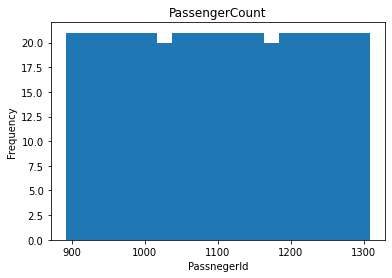

In [7]:
plt.xlabel('PassnegerId')
plt.ylabel('Frequency')
plt.title('PassengerCount')
plt.hist(submit.PassengerId, bins=20)


(array([278., 140.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

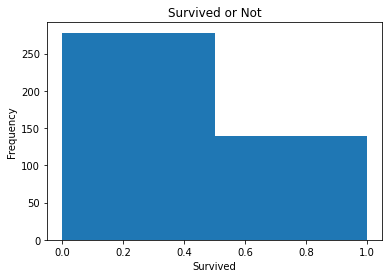

In [8]:
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Survived or Not')
plt.hist(submit.Survived, bins=2)

In [9]:
submit.to_csv('submission2.csv', index=False)